In [3]:
import json
import pandas as pd
from joblib import load
from sklearn import metrics, pipeline

### Modif baseline inference for IMDB dataset without retraining of models

In [4]:
model = pipeline.Pipeline([
    ('tf-idf', load('models/vect.joblib')),
    ('logreg', load('models/logreg.joblib')),
])

In [5]:
with open("../dataset/IMDB/IMDB_reviews.json") as json_file:
    data = pd.DataFrame(json.loads('[' + ',\n'.join(json_file.readlines()) + ']'))

/home/xx/anaconda3/envs/diploma/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


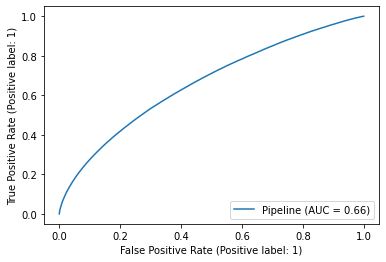

In [6]:
metrics.plot_roc_curve(model, data['review_text'], data['is_spoiler'].astype(int)) 

In [7]:
print(metrics.classification_report(data['is_spoiler'].astype(int),
                                    model.predict(data['review_text'])))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85    422989
           1       0.94      0.00      0.00    150924

    accuracy                           0.74    573913
   macro avg       0.84      0.50      0.43    573913
weighted avg       0.79      0.74      0.63    573913

